In [3]:
import torchvision
import torch

In [4]:
train_dataset = torchvision.datasets.MNIST(root='/content/dl_class', train=True, download=True)
train_dataset = torchvision.datasets.MNIST(root='/content/dl_class', train=False, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.2MB/s]


Extracting /content/dl_class/MNIST/raw/train-images-idx3-ubyte.gz to /content/dl_class/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]


Extracting /content/dl_class/MNIST/raw/train-labels-idx1-ubyte.gz to /content/dl_class/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]


Extracting /content/dl_class/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/dl_class/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]

Extracting /content/dl_class/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/dl_class/MNIST/raw



In [5]:
from torchvision import transforms

custom_transform = transforms.Compose([transforms.ToTensor()])

In [6]:
train_dataset = torchvision.datasets.MNIST(root='/content/dl_class', train=True, download=True,transform=custom_transform)
test_dataset = torchvision.datasets.MNIST(root='/content/dl_class', train=False, download=True,transform=custom_transform)

In [7]:
print(f'train dataset size: {len(train_dataset)}')
print(f'test dataset size: {len(test_dataset)}')

train dataset size: 60000
test dataset size: 10000


In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [9]:
sample1=iter(train_loader)

In [10]:
sample_image,sample_label=next(sample1)


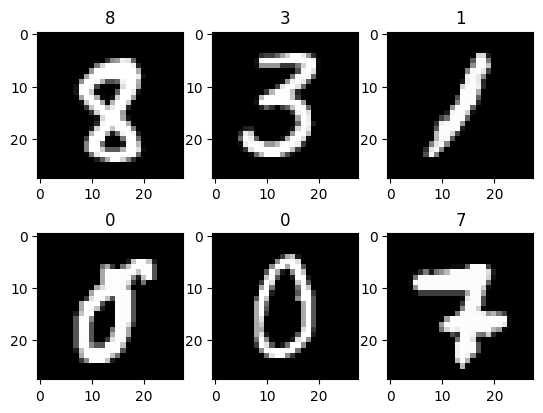

In [11]:
import matplotlib.pyplot as plt
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(sample_image[i][0],cmap='gray')
  plt.title(sample_label[i].item())


In [12]:
import torch.nn as nn

In [13]:
class MINIST_classfier(nn.Module):
  def __init__(self):
    super(MINIST_classfier,self).__init__()
    self.layer1=nn.Linear(784,500)
    self.sigmoid=nn.Sigmoid()
    self.layer2=nn.Linear(500,10)
    self.sigmoid=nn.Sigmoid()
  def forward(self,x):
    out1=self.layer1(x)
    out2=self.sigmoid(out1)
    out3=self.layer2(out2)
    return out3

In [14]:
model = MINIST_classfier()

In [15]:
model = model.to("cuda")

In [16]:
model

MINIST_classfier(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (sigmoid): Sigmoid()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
)

In [17]:
print(model)

MINIST_classfier(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (sigmoid): Sigmoid()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [19]:
for epoch in range(30):
  total_loss = 0
  for (image,labels) in train_loader:

    image = image.to("cuda")
    labels = labels.to("cuda")
    image = image.reshape(-1,784)
    y_pred = model(image)
    loss = criterion(y_pred,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f'epoch: {epoch+1}, loss: {total_loss}')

epoch: 1, loss: 1580.123996719718
epoch: 2, loss: 695.3976318761706
epoch: 3, loss: 614.7048267871141
epoch: 4, loss: 577.1470681875944
epoch: 5, loss: 553.8567098006606
epoch: 6, loss: 534.6768211703748
epoch: 7, loss: 515.7718625608832
epoch: 8, loss: 498.8806491866708
epoch: 9, loss: 480.56185728125274
epoch: 10, loss: 462.0264847110957
epoch: 11, loss: 442.653568983078
epoch: 12, loss: 423.6134660933167
epoch: 13, loss: 404.83754837326705
epoch: 14, loss: 386.8636277243495
epoch: 15, loss: 369.005474653095
epoch: 16, loss: 353.41641137190163
epoch: 17, loss: 339.57662910968065
epoch: 18, loss: 325.3410475002602
epoch: 19, loss: 311.9950618389994
epoch: 20, loss: 299.7126390589401
epoch: 21, loss: 287.8111703218892
epoch: 22, loss: 277.21837092004716
epoch: 23, loss: 266.8213661517948
epoch: 24, loss: 257.7426899038255
epoch: 25, loss: 248.65708008408546
epoch: 26, loss: 240.05250225961208
epoch: 27, loss: 232.44149080850184
epoch: 28, loss: 224.91177235450596
epoch: 29, loss: 217.6

In [20]:
model.eval()

MINIST_classfier(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (sigmoid): Sigmoid()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
)

In [21]:
import numpy as np
avg_acc=[]
with torch.no_grad():
  for (image_test,labels_test) in test_loader:
    image_test = image_test.to('cuda')
    labels_test = labels_test.to('cuda')
    total_correct=0
    n_sample=labels_test.size(0)
    image_test = image_test.reshape(-1,784)
    model_out = model(image_test)
    pred_out = torch.argmax(model_out,dim=1)
    total_correct = total_correct+ (pred_out == labels_test).sum().item()
    accuracy = total_correct/n_sample*100
    avg_acc.append(accuracy)

In [22]:
print(f'The model accuracy is {np.array(avg_acc).mean()}')

The model accuracy is 96.25599041533546
